## Machine Learning

In the following steps we will perform the following:

- Prepare the dataset
- Split in train and test
- Transform/Encode the features kand labels
- Test a wide range of ML models (Tree-based, Probabilistic and so on).
- Compare the accuracry of all models.
- Choose our winning model and tune hyperparameters to target a higher accuracy.
- Make a more profound evaluation of the result with a confusion matrix and different measures.
- Identify the most important features to predict the rating.

In [1]:
# import dependancies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for color palette
import warnings
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import tensorflow as tf
import numpy as np
from scipy import stats
# Import the kerastuner library
import keras_tuner as kt
import matplotlib.ticker as mtick


# Ignore all warnings
warnings.filterwarnings("ignore")



In [2]:
# read in data # NOTE TO REPLACE THIS WITH SQL

file_path = '../CSV_Output/ML_dataset.csv' # REPLACE WITH FINAL DATABASE

df = pd.read_csv(file_path)

df

,industry,wr1,wr2,wr3,wr4,vol1,vol2,vol3,vol4,pe_ratio,...,profit_margin,free_cash_margin,volatility,cpi,interest_rate,unemployment_rate,sma,rsi,ema,label
0,Consumer Discretionary,-0.019375,0.042774,-0.009555,-0.007692,6230100.0,6996900.0,6377700.0,7026700.0,30.01,...,14.40,13.74,0.025251,241.428,0.40,5.0,56.240000,8.149406,56.300000,0
1,Utilities,0.025644,0.011924,-0.006826,0.031470,175800.0,195300.0,233900.0,221400.0,17.58,...,11.15,1.49,0.013118,238.132,0.36,5.0,73.803333,87.796610,73.714583,0
2,Real Estate,0.057182,-0.004482,-0.040843,0.036994,1298900.0,3493600.0,571100.0,832500.0,62.13,...,12.97,29.98,0.019104,237.838,0.13,5.0,23.196667,88.260870,23.240833,0
3,Industrials,-0.044857,0.062964,0.055392,-0.058078,1071300.0,880100.0,1080400.0,994800.0,6.68,...,27.43,-18.14,0.023650,305.691,5.08,3.5,235.736667,11.037986,235.240833,0
4,Consumer Staples,0.022806,-0.021995,0.021842,-0.028000,6563300.0,6745100.0,9474700.0,10172500.0,10.28,...,4.55,10.21,0.019597,259.101,0.10,10.2,63.633333,72.448980,63.837083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,Consumer Discretionary,0.011118,0.019845,-0.060006,-0.000558,1252700.0,1125100.0,1055100.0,1414500.0,21.36,...,3.96,3.60,0.017376,243.603,0.66,4.6,34.243333,85.278276,34.327500,1
1910,Health Care,0.000624,0.003380,0.026196,0.020623,1086600.0,1062100.0,959900.0,700900.0,9.51,...,17.24,23.71,0.019483,267.054,0.07,6.1,127.980000,54.818523,128.192500,0
1911,Consumer Discretionary,-0.006360,0.040154,-0.038746,-0.026070,894900.0,935100.0,490500.0,490500.0,9.66,...,3.87,9.40,0.016327,251.712,2.40,4.0,66.236667,56.290439,66.580000,1
1912,Industrials,-0.005385,0.010020,0.101545,-0.066394,4106200.0,3906300.0,12259700.0,12259700.0,5.44,...,12.06,-4.79,0.027206,305.109,5.07,3.6,35.120000,43.270869,35.242500,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   industry                  1914 non-null   object 
 1   wr1                       1914 non-null   float64
 2   wr2                       1914 non-null   float64
 3   wr3                       1914 non-null   float64
 4   wr4                       1914 non-null   float64
 5   vol1                      1914 non-null   float64
 6   vol2                      1914 non-null   float64
 7   vol3                      1914 non-null   float64
 8   vol4                      1914 non-null   float64
 9   pe_ratio                  1914 non-null   float64
 10  debt_to_equity            1914 non-null   float64
 11  quick_ratio               1914 non-null   float64
 12  total_shareholder_return  1914 non-null   float64
 13  profit_margin             1914 non-null   float64
 14  free_cas

In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   industry                  1914 non-null   object 
 1   wr1                       1914 non-null   float64
 2   wr2                       1914 non-null   float64
 3   wr3                       1914 non-null   float64
 4   wr4                       1914 non-null   float64
 5   vol1                      1914 non-null   float64
 6   vol2                      1914 non-null   float64
 7   vol3                      1914 non-null   float64
 8   vol4                      1914 non-null   float64
 9   pe_ratio                  1914 non-null   float64
 10  debt_to_equity            1914 non-null   float64
 11  quick_ratio               1914 non-null   float64
 12  total_shareholder_return  1914 non-null   float64
 13  profit_margin             1914 non-null   float64
 14  free_cas

## Preprocessing the data

- Separate the label and features 
- Encode numerical columns, in this case, the industry column
- Split the data into training and testing data
- Scaling the data based on the training data


In [10]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["label"]

# Separate the X variable, the features
columns_to_keep = ['industry','vol1', 'vol2', 'vol3', 'vol4', 'ema', 'sma', 'rsi']

# Keep only the specified columns
X = df[columns_to_keep]

In [11]:
# Review the y variable Series
y[:5]

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [12]:
# Review the X variable DataFrame
X[:5]

,industry,vol1,vol2,vol3,vol4,ema,sma,rsi
0,Consumer Discretionary,6230100.0,6996900.0,6377700.0,7026700.0,56.300000,56.240000,8.149406
1,Utilities,175800.0,195300.0,233900.0,221400.0,73.714583,73.803333,87.796610
2,Real Estate,1298900.0,3493600.0,571100.0,832500.0,23.240833,23.196667,88.260870
3,Industrials,1071300.0,880100.0,1080400.0,994800.0,235.240833,235.736667,11.037986
4,Consumer Staples,6563300.0,6745100.0,9474700.0,10172500.0,63.837083,63.633333,72.448980


In [13]:
# One-hot encode the 'industry' column
X = pd.get_dummies(X, columns=['industry'])

X.head()

,vol1,vol2,vol3,vol4,ema,sma,rsi,industry_Basic Materials,industry_Communication Services,industry_Consumer Discretionary,industry_Consumer Staples,industry_Energy,industry_Finance,industry_Health Care,industry_Industrials,industry_Miscellaneous,industry_Real Estate,industry_Technology,industry_Telecommunications,industry_Utilities
0,6230100.0,6996900.0,6377700.0,7026700.0,56.300000,56.240000,8.149406,0,0,1,0,0,0,0,0,0,0,0,0,0
1,175800.0,195300.0,233900.0,221400.0,73.714583,73.803333,87.796610,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1298900.0,3493600.0,571100.0,832500.0,23.240833,23.196667,88.260870,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1071300.0,880100.0,1080400.0,994800.0,235.240833,235.736667,11.037986,0,0,0,0,0,0,0,1,0,0,0,0,0
4,6563300.0,6745100.0,9474700.0,10172500.0,63.837083,63.633333,72.448980,0,0,0,1,0,0,0,0,0,0,0,0,0


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   vol1                             1914 non-null   float64
 1   vol2                             1914 non-null   float64
 2   vol3                             1914 non-null   float64
 3   vol4                             1914 non-null   float64
 4   ema                              1914 non-null   float64
 5   sma                              1914 non-null   float64
 6   rsi                              1914 non-null   float64
 7   industry_Basic Materials         1914 non-null   uint8  
 8   industry_Communication Services  1914 non-null   uint8  
 9   industry_Consumer Discretionary  1914 non-null   uint8  
 10  industry_Consumer Staples        1914 non-null   uint8  
 11  industry_Energy                  1914 non-null   uint8  
 12  industry_Finance    

In [15]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## List of Machine Learning Models Used:

### 1. Random Forest (RF) 
### 2. XG Boost (XGB)
### 3. Tensor Flow (TF)
### 4. Logistic Regression (LR)
### 5. Linear Discriminant Analysis (LDT)
### 6. Neural Network (MLP)
### 7. K-Nearest Neighbors Algorithm (KNN)
### 8. Decision Tree Algorithm (DT) 
### 9. Bagging Decision Tree (BGT)
### 10. Gradient Boosting Classifier (GBT)
### 11. Support Vector Machine (SVM)
### 12. Naive Bayes Classifier (NB) 

### 1. Predicting the label using Random Forest

In [16]:
RF_model = RandomForestClassifier(random_state=1234)
RF_model.fit(X_train_scaled,y_train)

RF_training_predictions = RF_model.predict(X_train_scaled)
y_pred_RF = RF_model.predict(X_test_scaled)

Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)

print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.49269311064718163


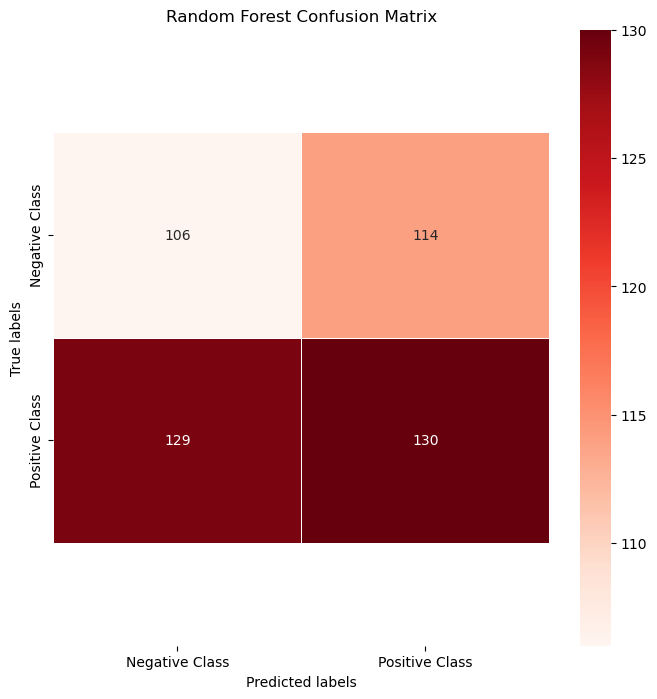

In [17]:
# Generate the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_RF, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [18]:
# Print the classification report for the model

# Create and save the training classification report
training_report_RF = classification_report(y_train, RF_training_predictions)
testing_report_RF = classification_report(y_test, y_pred_RF)

# Print the training classification report
print("Random Forest Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_RF)
print("")
print("Random Forest Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_RF)

Random Forest Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00       753

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435


Random Forest Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.48      0.47       220
           1       0.53      0.50      0.52       259

    accuracy                           0.49       479
   macro avg       0.49      0.49      0.49       479
weighted avg       0.50      0.49      0.49       479



#### From the matrix above it appears we have an over-fitting problem
______________________________________________________________________________________________________________________________

### 2. Predicting the label using XGBoost

In [19]:
# Create a binary XGBoost model
XGB_model = xgb.XGBClassifier(objective='binary:logistic')

# Train the model
XGB_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_XGB = XGB_model.predict(X_test_scaled)

# Calculate accuracy
accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy (Binary Classification):", accuracy_XGB)

XGB Accuracy (Binary Classification): 0.5198329853862212


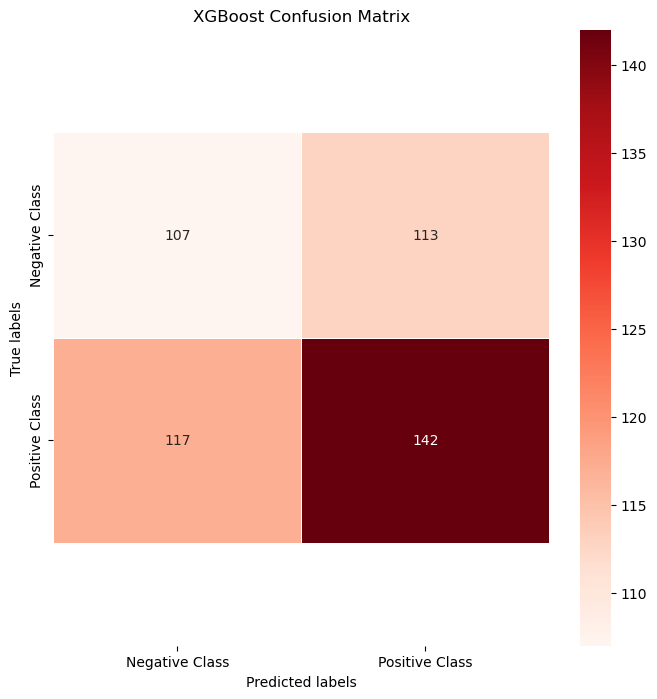

In [20]:
# Generate the confusion matrix
cm_XGB = confusion_matrix(y_test, y_pred_XGB)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_XGB, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('XGBoost Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()


In [21]:
# Print the classification report for the model

# Create and save the training classification report
XGB_training_predictions = XGB_model.predict(X_train_scaled)

training_report = classification_report(y_train, XGB_training_predictions)
testing_report = classification_report(y_test, y_pred_XGB)

# Print the training classification report
print("XGBoost Classification Report: Training Data")
print("---------------------------------------------")
print(training_report_RF)
print("")
print("XGBoost Classification Report: Testing Data")
print("--------------------------------------------")
print(testing_report_RF)

XGBoost Classification Report: Training Data
---------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00       753

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435


XGBoost Classification Report: Testing Data
--------------------------------------------
              precision    recall  f1-score   support

           0       0.45      0.48      0.47       220
           1       0.53      0.50      0.52       259

    accuracy                           0.49       479
   macro avg       0.49      0.49      0.49       479
weighted avg       0.50      0.49      0.49       479



#### Once again, we appear to have an over-fitting problem
_______________________________________________________________________________________________________________________________

### 3. Predicting the label with Tensor Flow

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                1680      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4751 (18.56 KB)
Trainable params: 4751 (18.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
           
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
           
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
45/45 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.5094
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5352
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6814 - accuracy: 0.5547
Epoch 4/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.5589
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5631
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5575
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5610
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5631
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5631
Epoch 10/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.5798
Epoch 11/

45/45 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.6432
Epoch 84/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6355
Epoch 85/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6085 - accuracy: 0.6439
Epoch 86/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6078 - accuracy: 0.6348
Epoch 87/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6116 - accuracy: 0.6334
Epoch 88/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.6300
Epoch 89/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6029 - accuracy: 0.6474
Epoch 90/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6071 - accuracy: 0.6495
Epoch 91/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6079 - accuracy: 0.6383
Epoch 92/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6481
Epoch 93/100


In [24]:
Accuracy_TF = model_accuracy

In [25]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  100
hidden_nodes_layer2 = 60
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               2100      
                                                                 
 dense_5 (Dense)             (None, 60)                6060      
                                                                 
 dense_6 (Dense)             (None, 30)                1830      
                                                                 
 dense_7 (Dense)             (None, 1)                 31        
                                                                 
Total params: 10021 (39.14 KB)
Trainable params: 10021 (39.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
           
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)
           
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
45/45 [==============================] - 1s 2ms/step - loss: 0.7081 - accuracy: 0.4969
Epoch 2/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5233
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.5289
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.5289
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6911 - accuracy: 0.5387
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6865 - accuracy: 0.5401
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5359
Epoch 8/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5359
Epoch 9/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6837 - accuracy: 0.5554
Epoch 10/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5470
Epoch 11/

45/45 [==============================] - 0s 4ms/step - loss: 0.6172 - accuracy: 0.6495
Epoch 84/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.6551
Epoch 85/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6153 - accuracy: 0.6481
Epoch 86/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6136 - accuracy: 0.6453
Epoch 87/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6103 - accuracy: 0.6509
Epoch 88/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6133 - accuracy: 0.6404
Epoch 89/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6102 - accuracy: 0.6613
Epoch 90/100
45/45 [==============================] - 0s 3ms/step - loss: 0.6088 - accuracy: 0.6627
Epoch 91/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.6599
Epoch 92/100
45/45 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.6718
Epoch 93/100


### 4. Predicting the label with Logistic Regression

In [27]:
LR_model = LogisticRegression(random_state=1234 , solver='lbfgs')
LR_model = LR_model.fit(X_train_scaled, y_train)
LR_training_predictions = LR_model.predict(X_train_scaled)
y_pred_LR = LR_model.predict(X_test_scaled)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)

print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.5365344467640919


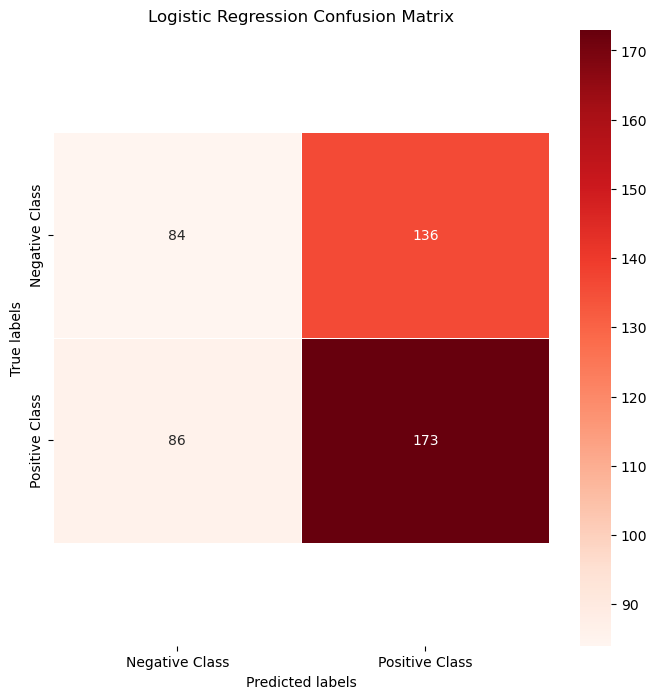

In [28]:
# Generate the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_LR, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [29]:
# Print the classification report for the model

# Create and save the training classification report
training_report_LR = classification_report(y_train, RF_training_predictions)
testing_report_LR = classification_report(y_test, y_pred_LR)

# Print the training classification report
print("Logistic Regression Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_LR)
print("")
print("Logistic Regression Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_LR)

Logistic Regression Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       682
           1       1.00      1.00      1.00       753

    accuracy                           1.00      1435
   macro avg       1.00      1.00      1.00      1435
weighted avg       1.00      1.00      1.00      1435


Logistic Regression Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.38      0.43       220
           1       0.56      0.67      0.61       259

    accuracy                           0.54       479
   macro avg       0.53      0.52      0.52       479
weighted avg       0.53      0.54      0.53       479



### 5. Predicting the label with Linear Discrimant Analysis

In [30]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train_scaled,y_train)
LDA_training_predictions = LDA_model.predict(X_train_scaled) 
y_pred_LDA = LDA_model.predict(X_test_scaled)
Accuracy_LDA = metrics.accuracy_score(y_test, y_pred_LDA)

print("LDA Accuracy:",Accuracy_LDA)

LDA Accuracy: 0.5302713987473904


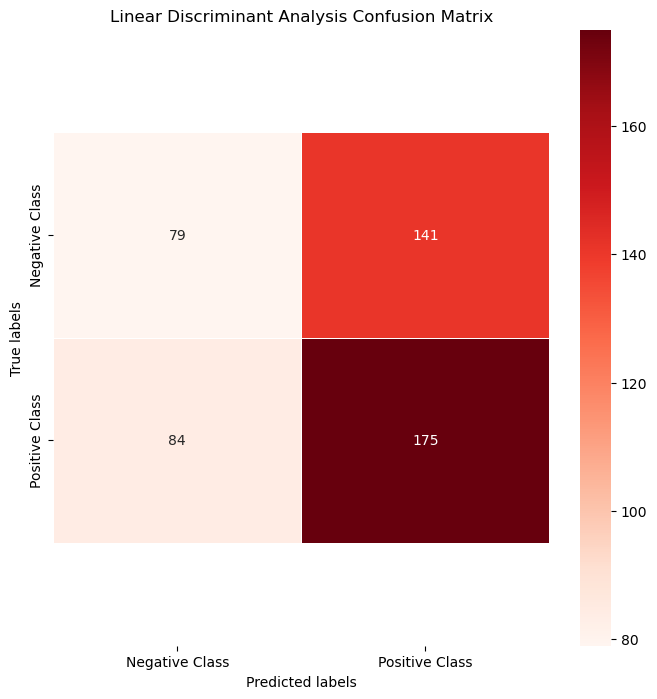

In [31]:
# Generate the confusion matrix
cm_LDA = confusion_matrix(y_test, y_pred_LDA)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_LDA, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Linear Discriminant Analysis Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [32]:
# Print the classification report for the model

 # Create and save the training classification report
training_report_LDA = classification_report(y_train, LDA_training_predictions)
testing_report_LDA = classification_report(y_test, y_pred_LDA)

# Print the training classification report
print("Linear Discriminant Analysis Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_LDA)
print("")
print("Linear Discriminant Analysis Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_LDA)

Linear Discriminant Analysis Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      0.36      0.44       682
           1       0.56      0.75      0.64       753

    accuracy                           0.56      1435
   macro avg       0.56      0.55      0.54      1435
weighted avg       0.56      0.56      0.54      1435


Linear Discriminant Analysis Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.36      0.41       220
           1       0.55      0.68      0.61       259

    accuracy                           0.53       479
   macro avg       0.52      0.52      0.51       479
weighted avg       0.52      0.53      0.52       479



### 6. Predicting the label with Neural Networks

In [33]:
MLP_model = MLPClassifier(hidden_layer_sizes=(25,25,25), activation='relu', solver='adam', max_iter=1500)
MLP_model.fit(X_train_scaled, y_train)
MLP_training_predictions = MLP_model.predict(X_train_scaled)
y_pred_MLP = MLP_model.predict(X_test_scaled)
Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)

print("MLP Accuracy:",Accuracy_MLP)

MLP Accuracy: 0.49269311064718163


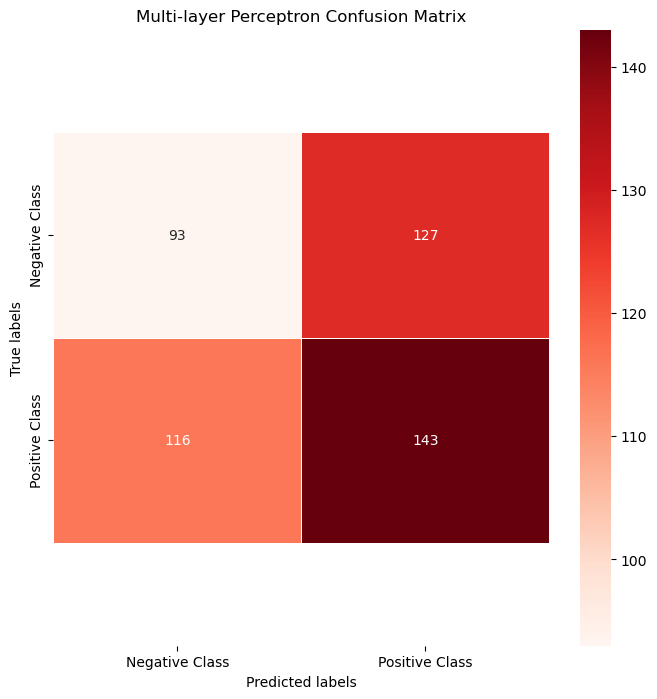

In [34]:
# Generate the confusion matrix
cm_MLP = confusion_matrix(y_test, y_pred_MLP)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_MLP, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Multi-layer Perceptron Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [35]:
# Print the classification report for the model

# Create and save the training classification report
training_report_MLP = classification_report(y_train, MLP_training_predictions)
testing_report_MLP = classification_report(y_test, y_pred_MLP)

# Print the training classification report
print("Multi-layer Perceptron Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_MLP)
print("")
print("Multi-layer Perceptron Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_MLP)

Multi-layer Perceptron Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       682
           1       0.68      0.75      0.71       753

    accuracy                           0.68      1435
   macro avg       0.68      0.68      0.68      1435
weighted avg       0.68      0.68      0.68      1435


Multi-layer Perceptron Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.44      0.42      0.43       220
           1       0.53      0.55      0.54       259

    accuracy                           0.49       479
   macro avg       0.49      0.49      0.49       479
weighted avg       0.49      0.49      0.49       479



### 7. Predicting the label with K-Nearest Neighbors Algorithm (KNN) 
## ERROR IN CODE - NEED TO FIX THIS
################################

In [36]:

model = KNeighborsClassifier(n_neighbors=1)

# Train the model
model.fit(X_train_scaled, y_train)

# Create predictions
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
# Generate the confusion matrix
cm_KNN = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_KNN, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('K-Nearest Neighbors Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [ ]:
# Print the classification report for the model

# Create and save the training classification report
training_report_KNN = classification_report(y_train, KNN_training_predictions)
testing_report_KNN = classification_report(y_test, y_pred_KNN)

# Print the training classification report
print("K-Nearest Neighbors Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_KNN)
print("")
print("K-Nearest Neighbors Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_KNN)

### 8. Predicting the label with Decision Tree Algorithm

In [38]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
DT_training_predictions = model.predict (X_train_scaled)
y_pred_DT = model.predict(X_test_scaled)
Accuracy_DT = accuracy_score(y_test, y_pred_DT)

print(f"Accuracy: {Accuracy_DT}")

Accuracy: 0.4592901878914405


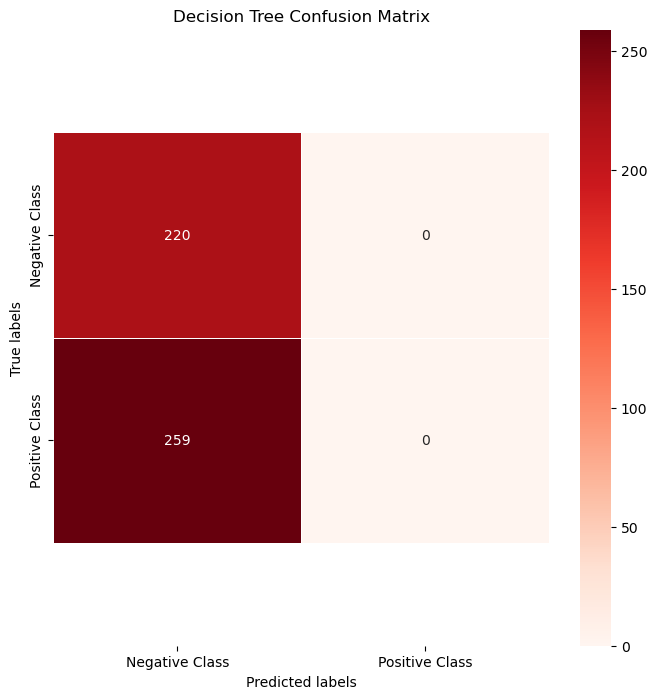

In [39]:
# Generate the confusion matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_DT, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [40]:
# Print the classification report for the model

# Create and save the training classification report
training_report_DT = classification_report(y_train, DT_training_predictions)
testing_report_DT = classification_report(y_test, y_pred_DT)

# Print the training classification report
print("Decision Tree Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_DT)
print("")
print("Decision Tree Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_DT)

Decision Tree Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      1.00      0.64       682
           1       0.00      0.00      0.00       753

    accuracy                           0.48      1435
   macro avg       0.24      0.50      0.32      1435
weighted avg       0.23      0.48      0.31      1435


Decision Tree Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       220
           1       0.00      0.00      0.00       259

    accuracy                           0.46       479
   macro avg       0.23      0.50      0.31       479
weighted avg       0.21      0.46      0.29       479



### 9. Bagging Decision Tree

In [41]:
base_classifier = DecisionTreeClassifier(random_state=42)
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=10, random_state=42)
bagging_classifier.fit(X_train_scaled, y_train)
BDT_training_predictions = bagging_classifier.predict(X_train_scaled)
y_pred_BDT = bagging_classifier.predict(X_test_scaled)
Accuracy_BDT = accuracy_score(y_test, y_pred_DT)

print(f"Accuracy: {Accuracy_BDT:.2f}")

Accuracy: 0.46


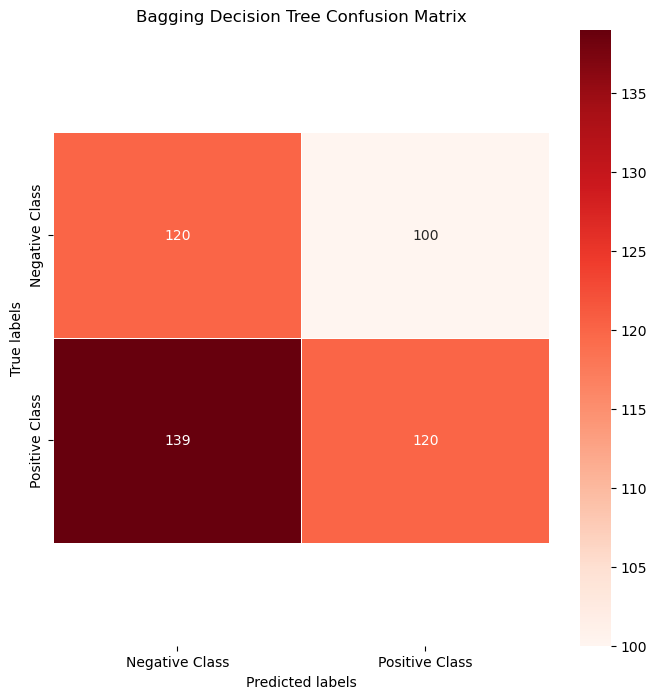

In [42]:
# Generate the confusion matrix
cm_BDT = confusion_matrix(y_test, y_pred_BDT)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_BDT, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Bagging Decision Tree Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [43]:
# Print the classification report for the model

# Create and save the training classification report
training_report_BDT = classification_report(y_train, BDT_training_predictions)
testing_report_BDT = classification_report(y_test, y_pred_BDT)

# Print the training classification report
print("Bagging Decision Tree Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_BDT)
print("")
print("Bagging Decision Tree Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_BDT)

Bagging Decision Tree Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       682
           1       0.99      0.97      0.98       753

    accuracy                           0.98      1435
   macro avg       0.98      0.98      0.98      1435
weighted avg       0.98      0.98      0.98      1435


Bagging Decision Tree Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.55      0.50       220
           1       0.55      0.46      0.50       259

    accuracy                           0.50       479
   macro avg       0.50      0.50      0.50       479
weighted avg       0.51      0.50      0.50       479



### 10. Gradient Boosting Classifier

In [44]:
GBT_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
GBT_model.fit(X_train_scaled, y_train)
GBT_training_predictions = GBT_model.predict(X_train_scaled)
y_pred_GBT = GBT_model.predict(X_test_scaled)
Accuracy_GBT = accuracy_score(y_test, y_pred_GBT)
print(f"Accuracy: {Accuracy_GBT:.2f}")

Accuracy: 0.49


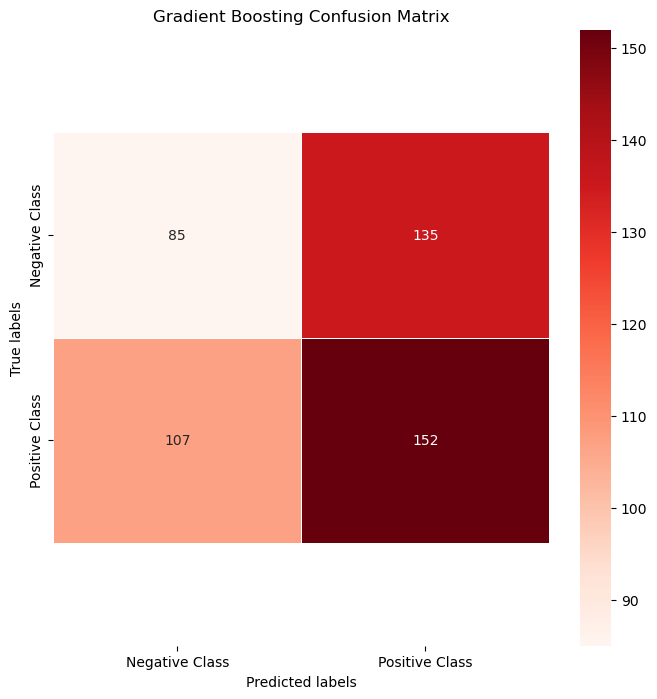

In [45]:
# Generate the confusion matrix
cm_GBT = confusion_matrix(y_test, y_pred_GBT)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_GBT, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Gradient Boosting Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [46]:
# Print the classification report for the model

# Create and save the training classification report
training_report_GBT = classification_report(y_train, DT_training_predictions)
testing_report_GBT = classification_report(y_test, y_pred_DT)

# Print the training classification report
print("Gradient Boosting Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_GBT)
print("")
print("Gradient Boosting Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_GBT)

Gradient Boosting Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      1.00      0.64       682
           1       0.00      0.00      0.00       753

    accuracy                           0.48      1435
   macro avg       0.24      0.50      0.32      1435
weighted avg       0.23      0.48      0.31      1435


Gradient Boosting Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       220
           1       0.00      0.00      0.00       259

    accuracy                           0.46       479
   macro avg       0.23      0.50      0.31       479
weighted avg       0.21      0.46      0.29       479



### 11. Support Vector Machine (SVM) 

In [47]:
svm_classifier = SVC(kernel='rbf',C=1.0, gamma='scale')
svm_classifier.fit(X_train_scaled, y_train)

SVM_training_predictions = svm_classifier.predict(X_train_scaled)

y_pred_SVM = svm_classifier.predict(X_test_scaled)

Accuracy_SVM = svm_classifier.score(X_test_scaled, y_test)

print(f"Accuracy: {Accuracy_SVM:.2f}")

Accuracy: 0.52


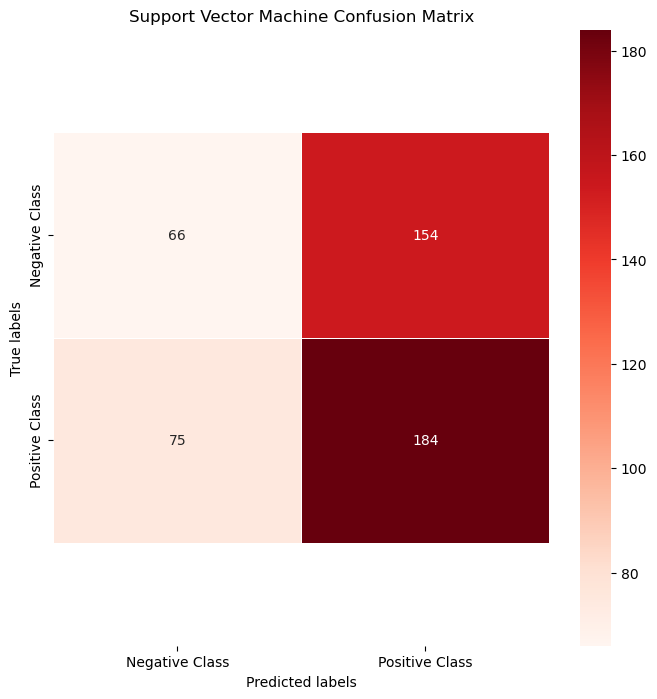

In [48]:
# Generate the confusion matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_SVM, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Support Vector Machine Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [49]:
# Print the classification report for the model

# Create and save the training classification report
training_report_SVM = classification_report(y_train, SVM_training_predictions)
testing_report_SVM = classification_report(y_test, y_pred_SVM)

# Print the training classification report
print("Support Vector Machine Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_SVM)
print("")
print("Support Vector Machine Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_SVM)

Support Vector Machine Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.57      0.33      0.42       682
           1       0.56      0.78      0.65       753

    accuracy                           0.56      1435
   macro avg       0.57      0.55      0.53      1435
weighted avg       0.57      0.56      0.54      1435


Support Vector Machine Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.30      0.37       220
           1       0.54      0.71      0.62       259

    accuracy                           0.52       479
   macro avg       0.51      0.51      0.49       479
weighted avg       0.51      0.52      0.50       479



### 12. Naive Bayes Classifier

In [50]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_scaled, y_train)
NB_training_predictions = naive_bayes_classifier.predict(X_train_scaled)
y_pred_NB = naive_bayes_classifier.predict(X_test_scaled)
Accuracy_NB = accuracy_score(y_test, y_pred_NB)

print(f"Accuracy: {Accuracy_NB:.2f}")

Accuracy: 0.47


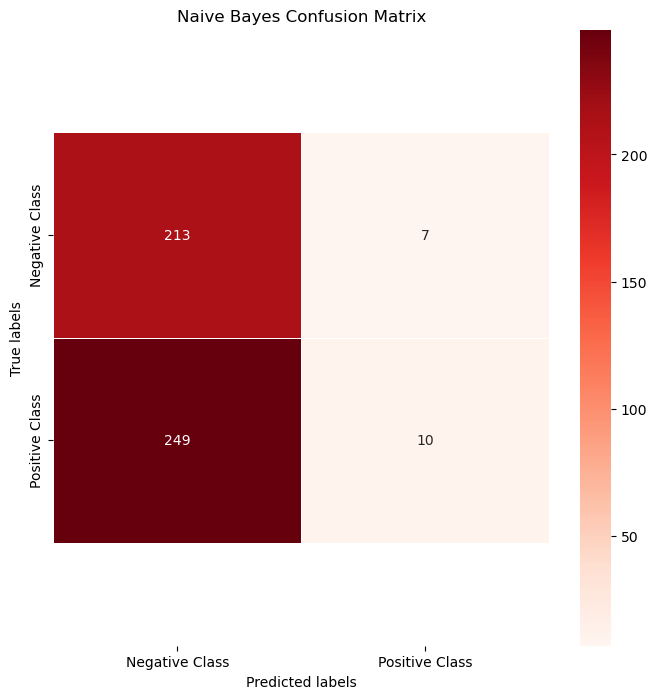

In [51]:
# Generate the confusion matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(cm_NB, annot=True, ax=ax, fmt="d", linewidths=.5, linecolor='white', cmap="Reds")

# labels, title, and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Naive Bayes Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative Class', 'Positive Class'])
ax.yaxis.set_ticklabels(['Negative Class', 'Positive Class'])

# Correct the bug from the heatmap function
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()

In [52]:
# Print the classification report for the model

# Create and save the training classification report
training_report_NB = classification_report(y_train, NB_training_predictions)
testing_report_NB = classification_report(y_test, y_pred_NB)

# Print the training classification report
print("Naive Bayes Classification Report: Training Data")
print("---------------------------------------------------")
print(training_report_NB)
print("")
print("Naive Bayes Classification Report: Testing Data")
print("---------------------------------------------------")
print(testing_report_NB)

Naive Bayes Classification Report: Training Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.98      0.65       682
           1       0.70      0.05      0.09       753

    accuracy                           0.49      1435
   macro avg       0.59      0.51      0.37      1435
weighted avg       0.60      0.49      0.35      1435


Naive Bayes Classification Report: Testing Data
---------------------------------------------------
              precision    recall  f1-score   support

           0       0.46      0.97      0.62       220
           1       0.59      0.04      0.07       259

    accuracy                           0.47       479
   macro avg       0.52      0.50      0.35       479
weighted avg       0.53      0.47      0.33       479



## Comparing our Accuracy Scores

In [53]:
accuracy_list = [Accuracy_RF, accuracy_XGB, Accuracy_TF, 
                 Accuracy_LR, Accuracy_LDA, Accuracy_MLP,
                 Accuracy_DT, Accuracy_BDT, 
                 Accuracy_GBT, Accuracy_SVM, Accuracy_NB]

model_list = ['Random Forest', 'XGBoost', 'Tensor Flow','Logistic Regression', 
              'Linear Discriminat','Neural Network',
              'Decision Tree', 'Bagging Decision Tree', 'Gradient Boosting',
              'Support Vector Machine', 'Naive Bayes']
             

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

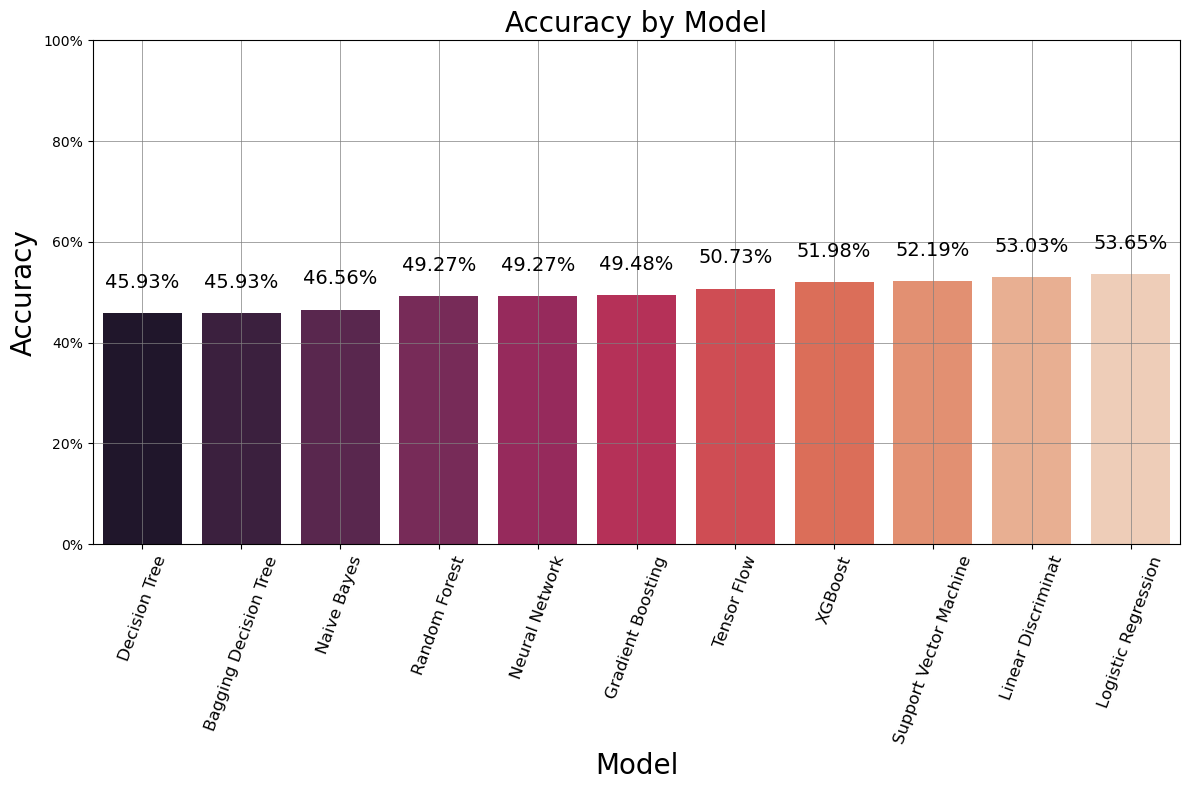

In [54]:
order = list(df_accuracy.sort_values('Accuracy', ascending=True).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=True).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))

# Make a barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

#y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
#ax.set_yticklabels(y_value)

plt.tight_layout()